In [6]:
import pandas as pd
df = pd.read_csv('./laptops_10.csv', encoding='latin1')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


#### 1.1 Изучите количество памяти с помощью matplotlib
#### 1.2 Изучите стоимость ноутбуков с помощью matplotlib
#### 1.3 Изучите вес ноутбуков с помощью matplotlib
* Постройте график
* Назовите график
* Сделайте именование оси x и оси y
* Сделайте выводы


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Цена')

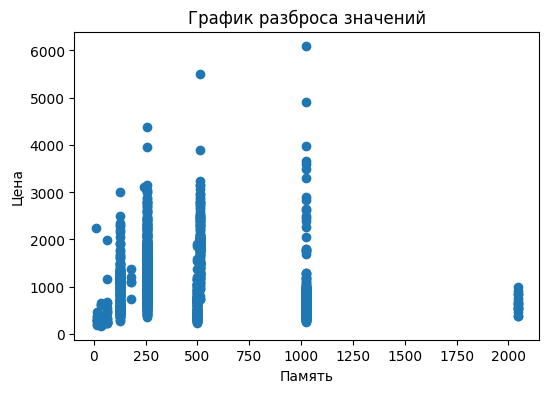

In [8]:
plt.figure(figsize=(6, 4))

plt.scatter(df['Memory_Amount'], df['Price_euros'])

plt.title('График разброса значений')
plt.xlabel('Память')
plt.ylabel('Цена');

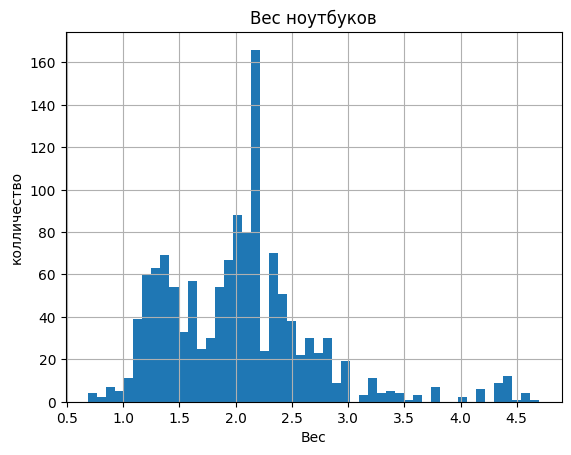

In [15]:
plt.figure()

plt.hist(df['Weight'],bins=50)

plt.title('Вес ноутбуков')
plt.xlabel('Вес')
plt.ylabel('колличество')
plt.grid()

#### 2.1 Изучите распределение типов носителя
#### 2.2 Изучите распределение компаний производителей
#### 2.3 Изучите распределение операционной системы
#### 2.4 Изучите распределение компаний производителей CPU

* Постройте график
* Сделайте выводы


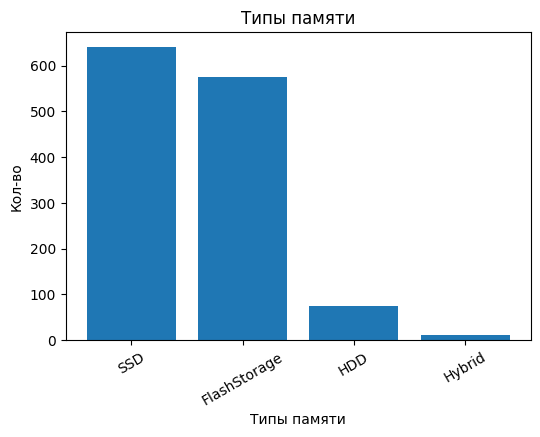

In [17]:
plt.figure(figsize=(6, 4))

plt.bar(df['Memory_Type'].unique(), df['Memory_Type'].value_counts())

plt.title('Типы памяти')
plt.xlabel('Типы памяти')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

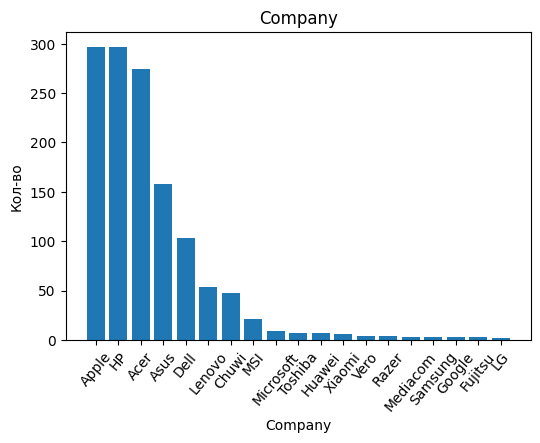

In [19]:
plt.figure(figsize=(6, 4))

plt.bar(df['Company'].unique(), df['Company'].value_counts())

plt.title('Company')
plt.xlabel('Company')
plt.ylabel('Кол-во')
plt.xticks(rotation=50);

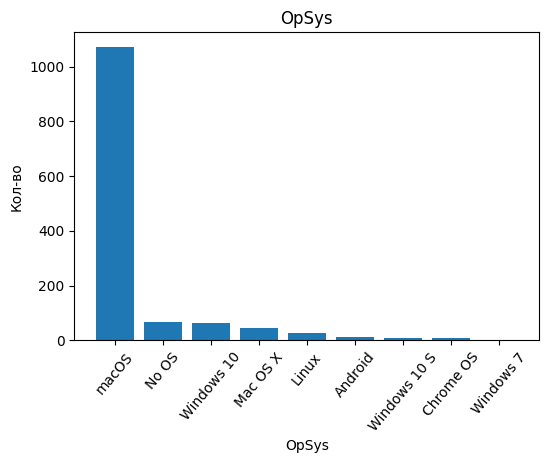

In [20]:
plt.figure(figsize=(6, 4))

plt.bar(df['OpSys'].unique(), df['OpSys'].value_counts())

plt.title('OpSys')
plt.xlabel('OpSys')
plt.ylabel('Кол-во')
plt.xticks(rotation=50);

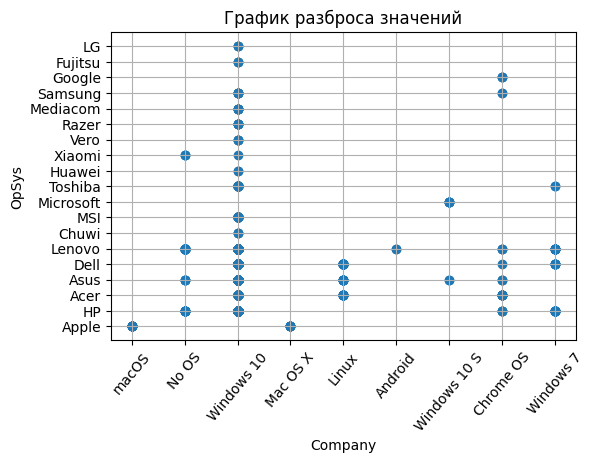

In [24]:
plt.figure(figsize=(6, 4))

plt.scatter(df['OpSys'], df['Company'])

plt.title('График разброса значений')
plt.xlabel('Company')
plt.ylabel('OpSys')
plt.xticks(rotation=50)
plt.grid();

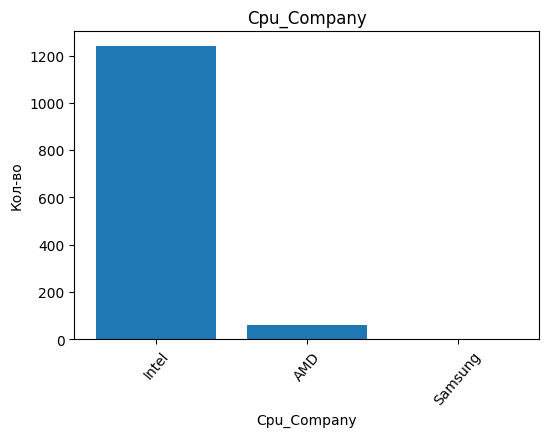

In [25]:
plt.figure(figsize=(6, 4))

plt.bar(df['Cpu_Company'].unique(), df['Cpu_Company'].value_counts())

plt.title('Cpu_Company')
plt.xlabel('Cpu_Company')
plt.ylabel('Кол-во')
plt.xticks(rotation=50);

In [27]:
# Готовим данные для графика
data = df['Cpu_Company'].value_counts()
data.index = df['Cpu_Company'].unique()
data.head()

Intel      1240
AMD          62
Samsung       1
Name: count, dtype: int64

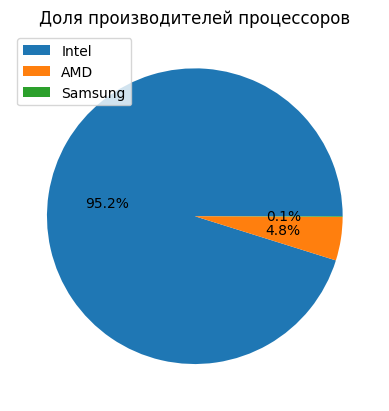

In [30]:
plt.figure()

plt.pie(data, autopct='%1.1f%%')
plt.title('Доля производителей процессоров')
plt.legend(data.index);

### Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте

3.1 Постройте график в абсолютных величинах

3.2 Постройте график в относительных величинах


In [40]:
df['Cpu_Company'][df['Cpu_Company']!='Samsung']

0       Intel
1       Intel
2       Intel
3       Intel
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301    Intel
1302    Intel
Name: Cpu_Company, Length: 1302, dtype: object

In [43]:
data = pd.crosstab(df['Company'], df['Cpu_Company'][df['Cpu_Company']!='Samsung']).reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


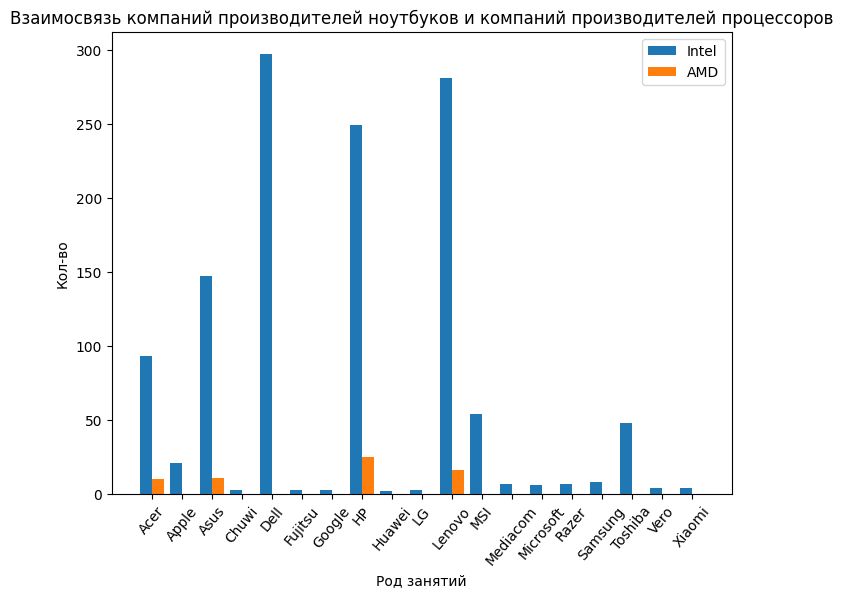

In [48]:
import numpy as np
# Строим столбчатую многорядную диаграмму

plt.figure(figsize=(8, 6))

# определяем кол-во делений
n_ticks = np.arange(len(data['Company']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['Intel'], width=w)
plt.bar(n_ticks + offset, data['AMD'], width=w)

plt.title('Взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров')
plt.xlabel('Компания')
plt.ylabel('Кол-во')
plt.legend(['Intel', 'AMD'])
plt.xticks(n_ticks, data['Company'], rotation = 50);  # добавляем метки делений

In [49]:
data = pd.crosstab(df['Company'], df['Cpu_Company'][df['Cpu_Company']!='Samsung'],normalize='index').reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,0.097087,0.902913
1,Apple,0.000000,1.000000
2,Asus,0.069620,0.930380
3,Chuwi,0.000000,1.000000
4,Dell,0.000000,1.000000
5,Fujitsu,0.000000,1.000000
6,Google,0.000000,1.000000
7,HP,0.091241,0.908759
8,Huawei,0.000000,1.000000
9,LG,0.000000,1.000000


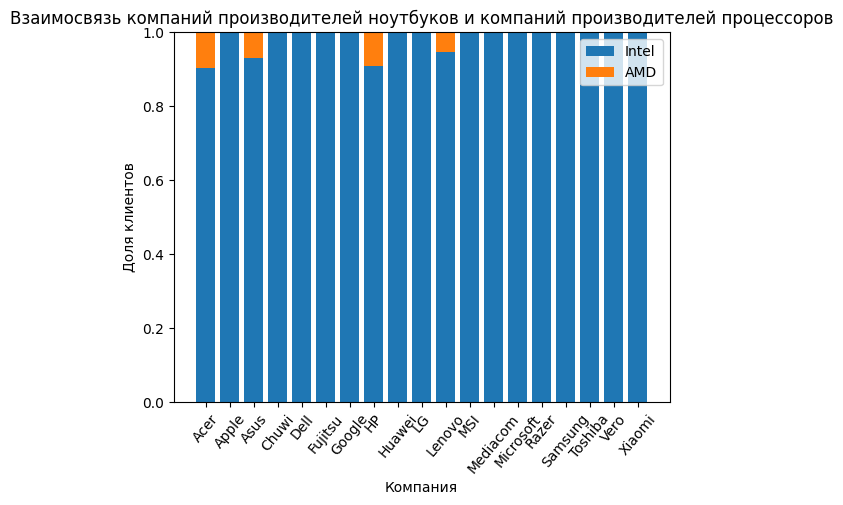

In [54]:
# Строим столбчатую многорядную сложенную диаграмму

plt.figure()

plt.bar(data['Company'], data['Intel'])
plt.bar(data['Company'], data['AMD'], bottom=data['Intel'])

plt.title('Взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров')
plt.xlabel('Компания')
plt.ylabel('Доля клиентов')
plt.legend(['Intel', 'AMD'])
plt.xticks(rotation = 50);

#### 4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора
#### 4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти
#### 4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти
#### 4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя
Постройте график
* Назовите график
* Сделайте именование оси x и оси y
* Сделайте выводы


In [56]:
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


In [58]:
# Готовим данные для графика
data1 = df['Price_euros'][df['Cpu_Company'] == 'Intel']
data2 = df['Price_euros'][df['Cpu_Company'] == 'AMD']
data1.head()

0    1339.69
1     898.94
2     575.00
3    2537.45
4    1803.60
Name: Price_euros, dtype: float64

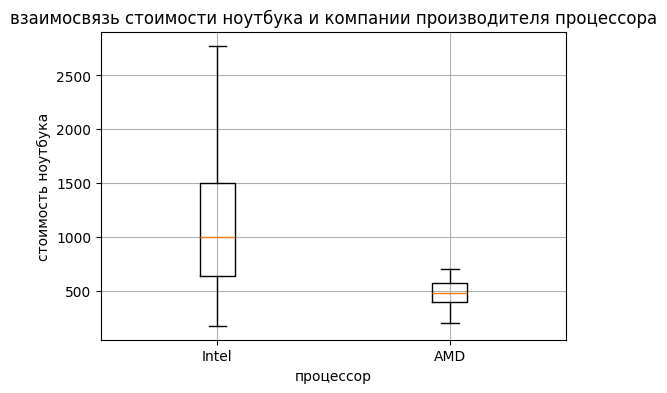

In [62]:
# Строим боксплот

plt.figure(figsize=(6, 4))

plt.boxplot([data1, data2],showfliers=False)

plt.title('взаимосвязь стоимости ноутбука и компании производителя процессора')
plt.xlabel('процессор')
plt.ylabel('стоимость ноутбука')
plt.xticks([1, 2], ['Intel', 'AMD'])
plt.grid();

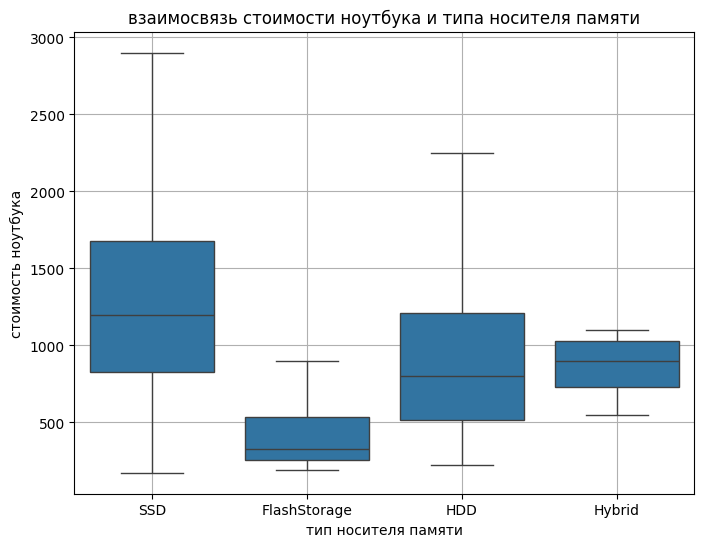

In [70]:
plt.figure(figsize=(8, 6))    
plt.title('взаимосвязь стоимости ноутбука и типа носителя памяти')
plt.xlabel('тип носителя памяти')
plt.ylabel('стоимость ноутбука')
sns.boxplot(x=df['Memory_Type'], y=df['Price_euros'],showfliers=False)
plt.grid()    
plt.show()

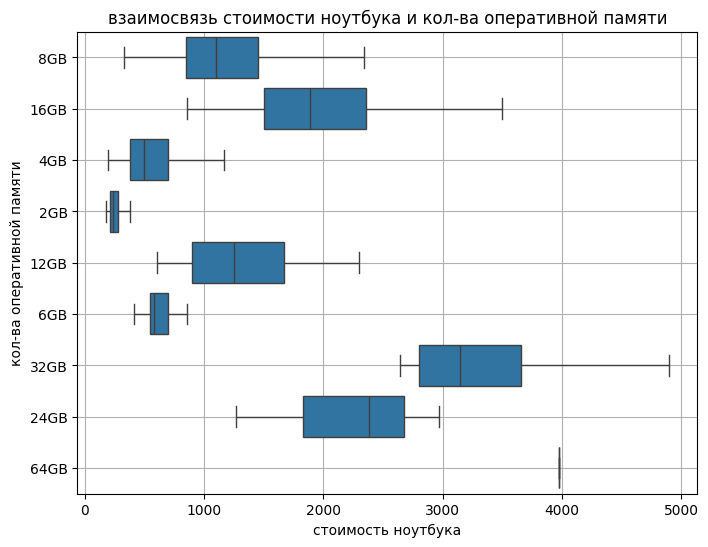

In [77]:
plt.figure(figsize=(8, 6))    
plt.title('взаимосвязь стоимости ноутбука и кол-ва оперативной памяти')
plt.xlabel('стоимость ноутбука')
plt.ylabel('кол-ва оперативной памяти')
sns.boxplot(x=df['Price_euros'], y=df['Ram'],showfliers=False,whis=1.5,color=_)
plt.grid()    
plt.show()

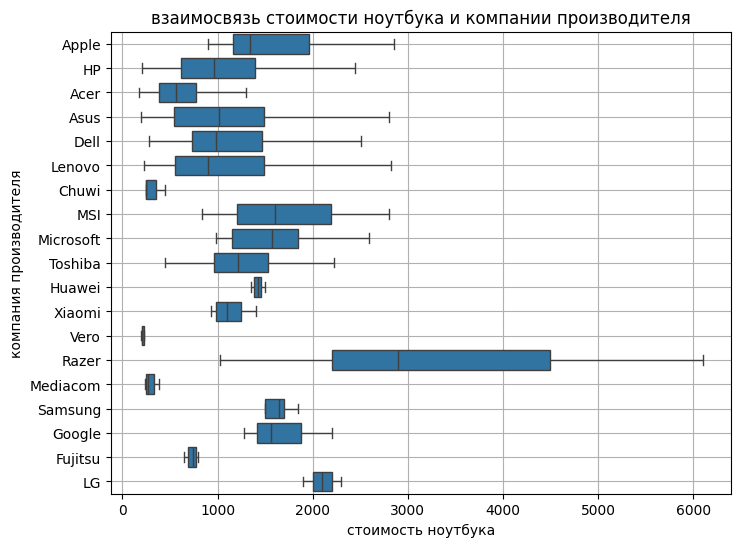

In [78]:
plt.figure(figsize=(8, 6))    
plt.title('взаимосвязь стоимости ноутбука и компании производителя')
plt.xlabel('стоимость ноутбука')
plt.ylabel('компания производителя')
sns.boxplot(x=df['Price_euros'], y=df['Company'],showfliers=False,whis=1.5)
plt.grid()    
plt.show()

## Постройте матрицу корреляций для таблицы


In [85]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.2] = 0
corr_matrix

,Inches,Weight,Price_euros,Memory_Amount
Inches,1.0,0.8,0.0,0.3
Weight,0.8,1.0,0.2,0.2
Price_euros,0.0,0.2,1.0,0.0
Memory_Amount,0.3,0.2,0.0,1.0


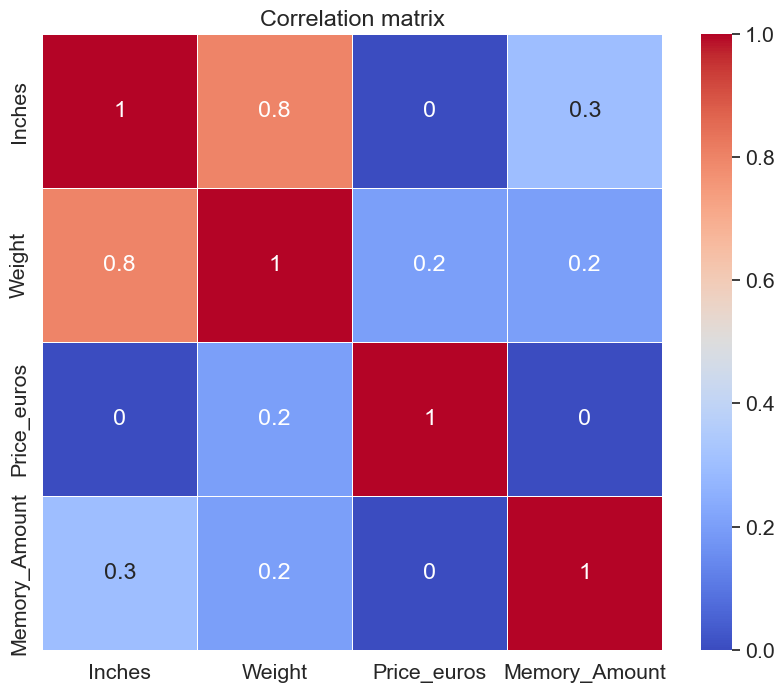

In [86]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');